Dalam proyek case study keempat ini, materi yang dipilih adalah image classification yang dalam pengolahannya menggunakan CNN. Adapun langkah-langkah dasar dalam pengolahan data dengan CNN, yaitu:
1. Data Preparation
  a. Memilih dataset. Dalam hal ini, dataset yang dipilih adalah mengenai klasifikasi panda dan beruang. dataset terdiri dari 1 folder utama bernama pandasbears, dan di dalamnya terdapat 2 folder berisi train dan test.
  b. pra-pemrosesan data. Dalam tahap ini mencakup rescaling image menjadi rentang 0 hingga 1, ataupun langkah-langkah lainnya untuk meningkatkan akurasi machine learning
  c. Split data menjadi train, validation dan test. datatrain untuk melatih model, validation untuk menentukan setting terbaik, dan datatest untuk evaluasi.
2. Mendefinisikan model.
  Dalam langkah ini, dipasang beberapa layer seperti convolutional layer, pooling layer dan fungsi aktivasi.
3. Model Training
  Melatih model selama beberapa kali iterasi (epoch)
4. Evaluasi
  

**DATA PREPARATION**

In [ ]:
# Import Library

from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import tensorflow as tf

num_classes = 10 #ten class
epochs = 20

# Dataset downloaded from https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification/data

In [ ]:
#Works with Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DATA**

In [ ]:
# Load dataset
data_dir = '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears'
train_dir = '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/train'
test_dir = '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test'

In [ ]:
# Memastikan folder train ada
if os.path.exists(train_dir):
    print("train_dir exists!")
else:
    print("train_dir does not exist. Please check the path.")

# Get list of filenames in train_dir
filenames = os.listdir(train_dir)

# Print filenames
print("Filenames in", train_dir, ":")
for filename in filenames:
  print(filename)

train_dir exists!
Filenames in /content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/train :
Bears
Pandas


In [ ]:
# Memastikan folder test ada

if os.path.exists(test_dir):
    print("test_dir exists!")
else:
    print("test_dir does not exist. Please check the path.")

# Get list of filenames in train_dir
filenames = os.listdir(test_dir)

# Print filenames
print("Filenames in", test_dir, ":")
for filename in filenames:
  print(filename)

test_dir exists!
Filenames in /content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test :
Bears
Pandas


**Pra-Pemrosesan Data**

In [ ]:
train_scale = ImageDataGenerator(rescale=1./255., validation_split=0.2) # Normalize value menjadi rentang 0 hingga 1
                                                                        # validation data adalah 20% dari data train
test_scale =  ImageDataGenerator(rescale=1./255.)

**SPLIT DATA**

In [ ]:
# Directory path train data
train_data = train_scale.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/train',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary'
)
# Validation data adalah 0.2 atau 20% dari data train
val_data = train_scale.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/train',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

# Directory path test data
test_data = test_scale.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


**PLOTTING THE IMAGES**

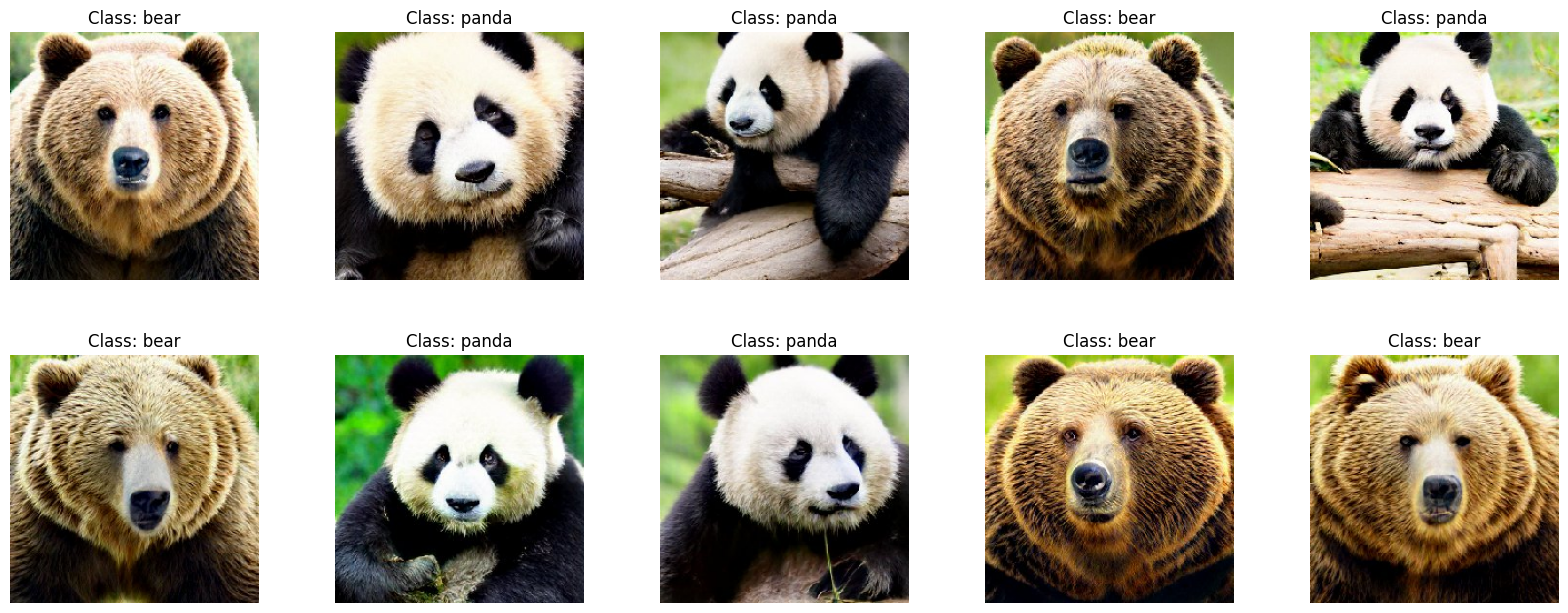

In [ ]:
labels = ['bear', 'panda']

samples = train_data.__next__()
images = samples[0] # data images diambil dari data train
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10): # iterasi sebanyak 10x
    plt.subplot(5,5,i+1) # 5 rows dan 5 kolom
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [ ]:
train_data, val_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x7e11ebecccd0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7e11ebeccdc0>)

**CNN MODELLING DEFINITION**

In [ ]:
cnn_model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'), # 32 convolutional filters size (3,3)
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])

Initialization -> input layer -> Convolutional Layers -> Pooling Layers -> Flatten Layer -> Fully Connected Layers


**COMPILE THE MODEL**

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**TRAIN THE MODEL**

In [ ]:
learner = cnn_model.fit(train_data, batch_size = 32,
                                 epochs = 75,
                                 validation_data = val_data,
                                 verbose = 1)

Epoch 1/75
13/13 [==============================] - 44s 3s/step - loss: 3.7396 - accuracy: 0.6300 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 2/75
13/13 [==============================] - 40s 3s/step - loss: 0.1417 - accuracy: 0.9700 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/75
13/13 [==============================] - 45s 3s/step - loss: 0.0033 - accuracy: 0.9975 - val_loss: 2.3610e-04 - val_accuracy: 1.0000
Epoch 4/75
13/13 [==============================] - 41s 3s/step - loss: 1.2722e-04 - accuracy: 1.0000 - val_loss: 3.6050e-05 - val_accuracy: 1.0000
Epoch 5/75
13/13 [==============================] - 42s 3s/step - loss: 7.0784e-05 - accuracy: 1.0000 - val_loss: 1.6262e-05 - val_accuracy: 1.0000
Epoch 6/75
13/13 [==============================] - 42s 3s/step - loss: 2.5401e-05 - accuracy: 1.0000 - val_loss: 1.2779e-04 - val_accuracy: 1.0000
Epoch 7/75
13/13 [==============================] - 39s 3s/step - loss: 1.8082e-05 - accuracy: 1.0000 - val_loss: 4.2059e-05 - val_a

**PLOT GRAPH TRAINING ACCURACY VS LOSS**

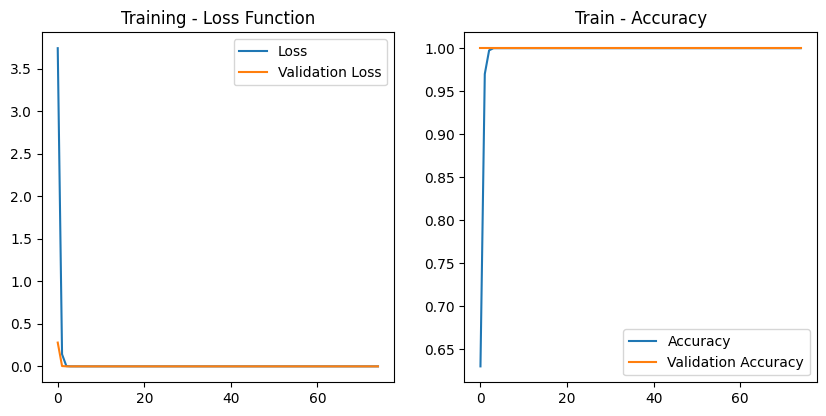

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(learner.history['loss'], label='Loss')
plt.plot(learner.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(learner.history['accuracy'], label='Accuracy')
plt.plot(learner.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')
plt.show()
plt.show()

Berdasarkan grafik diatas digambarkan bahwa accuracy mendekati 100% dan loss mendekati 0%. Oleh karena itu, dapat disimpulkan bahwa hasil training sudah cukup baik.

In [ ]:
score = cnn_model.evaluate(test_data,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0000
Test Accuracy : 1.0000


**VALIDATION**

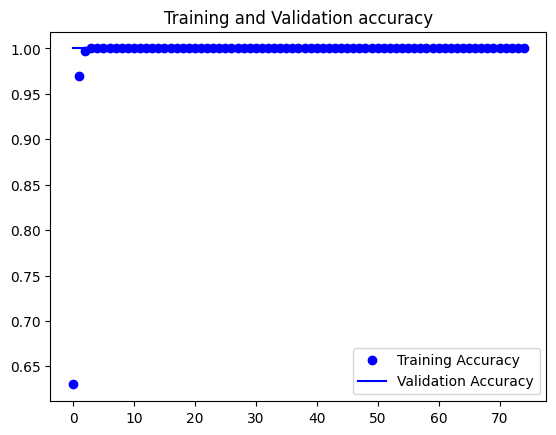

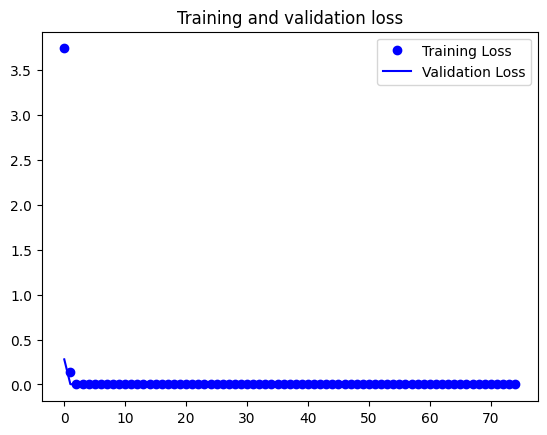

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = learner.history['accuracy']
val_accuracy = learner.history['val_accuracy']
loss = learner.history['loss']
val_loss = learner.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Dari hasil grafik validation pun, hasilnya tidak berbeda jauh dari grafik training, yaitu mendekati 100% accuracy dan mendekati 0% loss.

**IMAGE PREDICTION**

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_bear_panda(image_path, learner):
  # Load the image
  test_image = image.load_img(image_path, target_size=(224, 224))

  # Preprocess the image (assuming model expects specific preprocessing)
  test_image = image.img_to_array(test_image)
  test_image = test_image / 255.0  # Normalize pixel values (typical for CNNs)
  test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

  # Make prediction
  prediction = learner.predict(test_image)

  # Assuming binary classification (bear/panda) and categorical output:
  predicted_class = "bear" if np.argmax(prediction[0]) == 0 else "panda"

  # Return the predicted class
  return predicted_class

**TESTING**

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test/Bears/295.jpeg"
print("Using image path:", image_path)
predicted_class = predict_bear_panda(image_path, cnn_model)
print("Predicted class:", predicted_class)

Using image path: /content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test/Bears/295.jpeg
1/1 [==============================] - 0s 102ms/step
Predicted class: bear


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test/Pandas/295.jpeg"
print("Using image path:", image_path)
predicted_class = predict_bear_panda(image_path, cnn_model)
print("Predicted class:", predicted_class)

Using image path: /content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test/Pandas/295.jpeg
1/1 [==============================] - 0s 45ms/step
Predicted class: panda


Disini ditambahkan folder tambahan yaitu PandasBears_Combined untuk mengetahui apakah prediksi CNN akurat ketika file Bears dan Pandas dicampur.

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test_PandasBears_Combined/1.jpeg"
print("Using image path:", image_path)
predicted_class = predict_bear_panda(image_path, cnn_model)
print("Predicted class:", predicted_class)

Using image path: /content/drive/MyDrive/Colab Notebooks/Kelas Work/Project/Case Study 4/PandasBears/test_PandasBears_Combined/1.jpeg
1/1 [==============================] - 0s 49ms/step
Predicted class: panda
